$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$

# Empalme con la clase anterior
## Metodo de Jacobi
$$A = L + D + U $$
$$D = A - L - U$$

$$A \bmx = \bmb $$
$$(L + D + U) \bmx = \bmb $$
$$ D \bmx = -(L + U) \bmx +  \bmb $$

A este sistema lo convertimos en un sistema iterativo

$$ D \bmx_{k+1} = -(L + U) \bmx_k +  \bmb $$
$$  \bmx_{k+1} = -D^{-1} (L + U) \bmx_k +  \bmb $$
Asumiendo que en la diagonal no hay 0

Esta iteracion cae en el marco

$$\bmx_k = T_j \bmx_{k-1} + \bmc  $$
Donde
$$ T_j  = -D^{-1}(L+U) \quad, \quad \bmc = D^{-1} \bmb$$

Llevemos esto a forma "granulada" (por componentes)

$$x_i^{(k)} = \frac{1}{a_{ii}} \left [
  \sum_{j=1, j \ne i}^n (-a_{ij}) x_j^{(k-1)} + b_i  \right ]  $$

Una forma facil de ver el metodo de Jacobi

$$ \sum_j a_{ij} x_j = b_j $$

Despejando $x_i$

$$ x_i = \left ( b_i - \sum_{j, i \ne j}^n a_{ij} x_j   \right ) / a_{ii} $$

Veamos un ejemplo.

**Ejemplo 1.2.1**: Encuentre la solucion aproximada del sistema

$$\begin{pmatrix} 5 & -2 & 3 \\ -3 & 8 & 1 \\ -3 & -1 & -6 \end{pmatrix}
\begin{pmatrix} x_1  \\ x_2 \\ x_3\end{pmatrix} =
\begin{pmatrix}  -1 \\ 4 \\ 0\end{pmatrix} $$

El error maximo es 0.5 (usando la norma $\ell_2$.

La primera ecuacion de aca es:

Se debe asumir siempre una solucion inicial (initial guess).
$\bmx_0 = (0,0,0)$.

$$5 x_1 - 2 x_2 + 3 x_3 = -1 $$

Despejemos $x_1$

$$x_1 = -\frac15 =-0.2$$
Vamos a la segunda ecuacion (con $x_1, x_3=0$)

$$-3 x_1 + 8 x_2 + x_3 = 4 $$
$x_2 = \frac12=0.5$

Vamos para la tercera ecuacion

Asumimos $x_1, x_2=0$
$$ -3 x_1 - x_2 - 6 x_3 = 0 $$
de forma que $x_3=0$

La solucion es entonces

$$\bmx^{1} = \begin{pmatrix} -0.2 \\ 0.5  \\ 0 \end{pmatrix} $$

El error usando $\ell_2$ es

$$\| \bmx^1 - \bmx^0 \| = | \bmx^1| = \sqrt{-0.2^2 + 0.5^2 + 0^2} $$



In [4]:
import numpy as np
x1 = np.array( [-0.2, 0.5,0])
x2 = np.array( [0, 0.425, 0.0161616])

# la norma dos de x es
np.linalg.norm(x1-x2)





0.21421063772502058

Como $0.5385 > 0.5$ el algoritmo sigue.

$$x_1^{(2)} = -\frac15 [ 2(0.5) - 3(0) -1] = 0  $$
$$x_2^{(2)} = \frac18 [ 3(-0.2) + 0 + 4] = 0.425 $$
$$x_3^{(2)} = -\frac16 [ 3(-0.2) + 0.5] = 0.0\overline{16}$$

Ahora calculamos la norma de $\| \bmx_2 - \bmx_1 \|$

$$\| \bmx_2 - \bmx_1 \| = \sqrt{0.2^2 + (0.5-0.425)^2 + + 0.161616^2} \approx 0.2142 $$





En este momento como $0.2142 < 0.5$ ya se acabaron las iteraciones y la solucion es, con iteraciones incluidas

$$\text{solucion} = \{ (0,0,0)^T, (-0.2,0.5,0)^T, (0, 0.425, 0.0\overline{16})^T  \} $$

Pregunta: Cuando este sistema converge? De la primera parte del curso sabemos que el sistema converge si $\rho(T_j) < 1$.

**Teorema 1.2.1**: Si $A$ es estrictamente diagonal dominante  por filas ( o por columnas) las iteraciones de Jacobi relacionadasa a $A$ convergen.

Prueba:
Asumamos que $A$ es estrictamente diagonal dominante por filas


$$\sum_{j \ne i} | a _{ij} | < | a_{ii} |  $$
para cada $i=1,2, \cdots, n$. De forma que, dividiendo por $|a_{ii}|$ tenemos

$$ \frac{\sum_{j \ne i} | a_{ij} |}{|a_{ii}| }  < 1 \quad , \quad i=1,2, \cdots, n$$

Por lo tanto
$$ \max_i \frac{\sum_{j \ne i} | a_{ij} |}{|a_{ii}| }  < 1 $$

El operador $T$ cumple la ecuacion

$$T_j = -D^{-1} ( L+ U) $$

$$\| T \|_{\infty} = \max_i \frac{\sum_{j \ne i} a_{ij}}{| a_{ii}|} < 1 $$
Recuerden que $\| A \| \ge \rho(A)$
entonces, en este caso

$$ \| T \|_\infty < 1 $$
O sea que $\rho(T) < 1$, y por lo tanto la recursion converge.

Implementacion algoritmica.



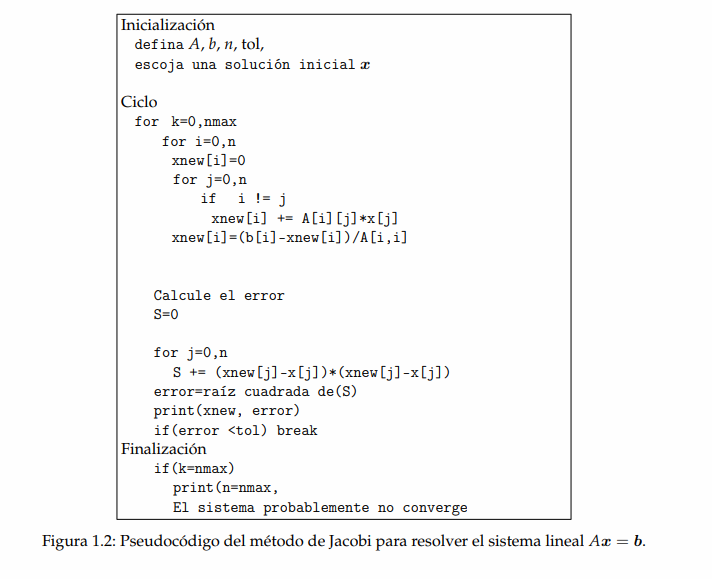

In [18]:
# metodo de Jacobi
import numpy as np
from numpy import linalg as LA

def Jacobi(A, b, nmax, tol):
    n = len(A) # esto extrae las dimensiones
    D = np.diag(A) # matriz diagonal
    # para calcular LU restamos la diagonal de A
    LU =  A - np.diag(D)
    x = np.zeros(n)
    k=0

    print("Diagonal", D)

    error=10
    while( k< nmax and tol<error):
        k += 1
        xnew = (b - np.dot(LU, x)) / D
        error = LA.norm(xnew - x)
        x = xnew
        print("xnew ", xnew)
        print("solucion x para la iteracion k=%2d con error %5.4f" %(k, error))

    if k==nmax:
        print("el maximo numero de iteraciones se alcanzo")
        print("probablemente el sistema no converge")


# prueba


In [19]:
# prueba
A = np.array( [[5, -2, 3],
               [-3, 8, 1.] ,
               [-3, -1, -6]])

# vector b
b = np.array([-1, 4, 0])

nmax=100
tol=0.001
Jacobi(A, b, nmax, tol)

Diagonal [ 5.  8. -6.]
xnew  [-0.2  0.5 -0. ]
solucion x para la iteracion k= 1 con error 0.5385
xnew  [0.         0.425      0.01666667]
solucion x para la iteracion k= 2 con error 0.2142
xnew  [-0.04        0.49791667 -0.07083333]
solucion x para la iteracion k= 3 con error 0.1207
xnew  [ 0.04166667  0.49385417 -0.06298611]
solucion x para la iteracion k= 4 con error 0.0821
xnew  [ 0.03533333  0.52349826 -0.10314236]
solucion x para la iteracion k= 5 con error 0.0503
xnew  [ 0.07128472  0.5261428  -0.10491638]
solucion x para la iteracion k= 6 con error 0.0361
xnew  [ 0.07340694  0.53984632 -0.12333283]
solucion x para la iteracion k= 7 con error 0.0231
xnew  [ 0.08993822  0.54294421 -0.12667786]
solucion x para la iteracion k= 8 con error 0.0171
xnew  [ 0.0931844   0.54956157 -0.13545981]
solucion x para la iteracion k= 9 con error 0.0115
xnew  [ 0.10110051  0.55187663 -0.13818579]
solucion x para la iteracion k=10 con error 0.0087
xnew  [ 0.10366213  0.55518592 -0.14252969]
solucio

In [21]:
# verfiquemos la solucion
from scipy.linalg import solve
x = solve(A, b)
print(x)

[ 0.11607143  0.5625     -0.15178571]


calculemos el radio espectral
$T_j = -D^{-1}(L+U)$, no $A$


In [23]:
from numpy.linalg import inv

def radio_espectral(A):
    D = np.diag(A)
    n = np.size(A,1)
    LU = A - np.diag(D)
    T = -np.matmul( inv(np.diag(D)), LU)
    autovalores = LA.eigvals(T)
    print("T")
    print(T)
    print("autovalores")
    print(autovalores)
    return max(abs(autovalores))

radio_espectral(A)


T
[[-0.          0.4        -0.6       ]
 [ 0.375      -0.         -0.125     ]
 [-0.5        -0.16666667 -0.        ]]
autovalores
[ 0.74481338 -0.60644324 -0.13837014]


0.7448133799005093

In [24]:
# Implementacion escalar.
def Jacobi2(A, b, nmax, tol):
    n=len(b)
    x=np.zeros(n)
    xnew = np.zeros(n)
    error = 100

    for k in range(nmax):
        for i in range(n):
            s = 0
            for j in range(n):
                if i != j:
                    s += A[i,j]*x[j]

            xnew[i] = (b[i] - s) / A[i,i]
        error = LA.norm(xnew - x)
        x = xnew.copy()
        print("xnew ", xnew)
        print("solucion x para la iteracion k=%2d con error %5.4f" %(k, error))

        if error < tol:
            break
    if k==nmax-1:
        print("el maximo numero de iteraciones se alcanzo")
        print("probablemente el sistema no converge")

    return

nmax=100
tol=0.001
Jacobi2(A, b, nmax, tol)

xnew  [-0.2  0.5 -0. ]
solucion x para la iteracion k= 0 con error 0.5385
xnew  [0.         0.425      0.01666667]
solucion x para la iteracion k= 1 con error 0.2142
xnew  [-0.04        0.49791667 -0.07083333]
solucion x para la iteracion k= 2 con error 0.1207
xnew  [ 0.04166667  0.49385417 -0.06298611]
solucion x para la iteracion k= 3 con error 0.0821
xnew  [ 0.03533333  0.52349826 -0.10314236]
solucion x para la iteracion k= 4 con error 0.0503
xnew  [ 0.07128472  0.5261428  -0.10491638]
solucion x para la iteracion k= 5 con error 0.0361
xnew  [ 0.07340694  0.53984632 -0.12333283]
solucion x para la iteracion k= 6 con error 0.0231
xnew  [ 0.08993822  0.54294421 -0.12667786]
solucion x para la iteracion k= 7 con error 0.0171
xnew  [ 0.0931844   0.54956157 -0.13545981]
solucion x para la iteracion k= 8 con error 0.0115
xnew  [ 0.10110051  0.55187663 -0.13818579]
solucion x para la iteracion k= 9 con error 0.0087
xnew  [ 0.10366213  0.55518592 -0.14252969]
solucion x para la iteracion k

## Ejercicio de no convergencia

In [25]:
A = np.array ([[1,3],[3,1]])
b = np.array([-1,4])
nmax=10
tol=0.1
Jacobi(A, b, nmax, tol)

Diagonal [1 1]
xnew  [-1.  4.]
solucion x para la iteracion k= 1 con error 4.1231
xnew  [-13.   7.]
solucion x para la iteracion k= 2 con error 12.3693
xnew  [-22.  43.]
solucion x para la iteracion k= 3 con error 37.1080
xnew  [-130.   70.]
solucion x para la iteracion k= 4 con error 111.3239
xnew  [-211.  394.]
solucion x para la iteracion k= 5 con error 333.9716
xnew  [-1183.   637.]
solucion x para la iteracion k= 6 con error 1001.9147
xnew  [-1912.  3553.]
solucion x para la iteracion k= 7 con error 3005.7440
xnew  [-10660.   5740.]
solucion x para la iteracion k= 8 con error 9017.2320
xnew  [-17221.  31984.]
solucion x para la iteracion k= 9 con error 27051.6960
xnew  [-95953.  51667.]
solucion x para la iteracion k=10 con error 81155.0880
el maximo numero de iteraciones se alcanzo
probablemente el sistema no converge


In [26]:
radio_espectral(A)

T
[[-0. -3.]
 [-3. -0.]]
autovalores
[ 3. -3.]


3.000000000000001

## Matriz de convergencia para Jacobi pero no para Gauss-Seidel

In [28]:
A = np.array( [[1,0,1], [-1,1,0], [1,2,-3]])
radio_espectral(A)



T
[[-0.         -0.         -1.        ]
 [ 1.         -0.         -0.        ]
 [ 0.33333333  0.66666667 -0.        ]]
autovalores
[ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]


0.9444378697709912

## matriz de divrergencia para Jacobi y convergencia para Gauss-Seidel


In [30]:
A = np.array( [[ 1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]] )
radio_espectral(A)

T
[[-0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5 -0. ]]
autovalores
[ 0.5 -1.   0.5]


0.9999999999999998